# Version 1

Getting Kaggle dataset from API

In [1]:
#install the kaggle library
!pip install kaggle

In [2]:
#configure the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Kaggle API
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 77% 125M/163M [00:00<00:00, 1.30GB/s]
100% 163M/163M [00:00<00:00, 1.20GB/s]


In [4]:
#extracting the compressed files
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir("/content/data/with_mask")
without_mask_files = os.listdir("/content/data/without_mask")

In [8]:
print(with_mask_files[0:5])
print(without_mask_files[0:5])

['with_mask_2720.jpg', 'with_mask_727.jpg', 'with_mask_2630.jpg', 'with_mask_2719.jpg', 'with_mask_3192.jpg']
['without_mask_3246.jpg', 'without_mask_2401.jpg', 'without_mask_3368.jpg', 'without_mask_1808.jpg', 'without_mask_3137.jpg']


In [9]:
print('Number of with Mask Images: ', len(with_mask_files))
print('Number of without Mask Images: ', len(without_mask_files))

Number of with Mask Images:  3725
Number of without Mask Images:  3828


Creating the labels

with mask --> 1

without mask --> 0

In [10]:
#creating the labels

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

(np.float64(-0.5), np.float64(182.5), np.float64(274.5), np.float64(-0.5))

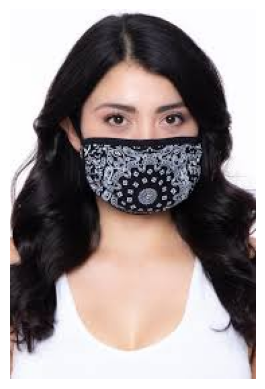

In [15]:
#displaying the with mask images

img = mpimg.imread("/content/data/with_mask/with_mask_2139.jpg")
imgplot = plt.imshow(img)
plt.show
plt.axis("off")

(np.float64(-0.5), np.float64(182.5), np.float64(274.5), np.float64(-0.5))

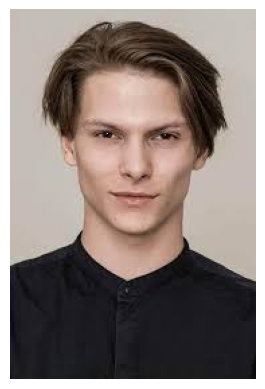

In [16]:
#displaying the without mask images

img = mpimg.imread("/content/data/without_mask/without_mask_1085.jpg")
imgplot = plt.imshow(img)
plt.show
plt.axis("off")

Resizing the image

In [17]:
#convert images to numpy arrays

with_mask_path = 'data/with_mask'
without_mask_path = 'data/without_mask'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + '/' + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

for img_file in without_mask_files:
  image = Image.open(without_mask_path + '/' + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

In [20]:
print(data[0])

[[[ 17  82 112]
  [ 18  83 113]
  [ 19  84 114]
  ...
  [ 13  78 108]
  [ 14  78 106]
  [ 16  78 103]]

 [[ 18  83 113]
  [ 18  83 113]
  [ 19  84 114]
  ...
  [ 14  79 109]
  [ 13  78 106]
  [ 15  78 104]]

 [[ 18  83 114]
  [ 19  84 114]
  [ 20  85 115]
  ...
  [ 14  79 109]
  [ 14  79 107]
  [ 15  79 106]]

 ...

 [[ 51 116 154]
  [ 51 116 154]
  [ 51 116 154]
  ...
  [ 50 115 153]
  [ 48 114 152]
  [ 46 114 151]]

 [[ 51 116 154]
  [ 51 116 154]
  [ 51 116 154]
  ...
  [ 49 114 152]
  [ 47 114 151]
  [ 45 113 150]]

 [[ 50 115 153]
  [ 50 115 153]
  [ 50 115 153]
  ...
  [ 48 113 151]
  [ 47 113 151]
  [ 45 113 150]]]


In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting the image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)

In [23]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [24]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size = 0.2 , random_state = 2)

In [25]:
print(X.shape , X_train.shape , X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [26]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [27]:
print(X_train_scaled)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.05098039 0.0745098  0.06666667]
   [0.18823529 0.21176471 0.19607843]
   [0.83137255 0.85490196 0.83921569]]

  [[1.         1.         1.        ]
   [1. 

Building a Neural Network

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
#compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
#training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.7015 - loss: 0.6089 - val_accuracy: 0.8479 - val_loss: 0.3432
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8826 - loss: 0.2851 - val_accuracy: 0.9091 - val_loss: 0.2307
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9097 - loss: 0.2270 - val_accuracy: 0.8975 - val_loss: 0.2398
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9241 - loss: 0.1937 - val_accuracy: 0.9207 - val_loss: 0.1969
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9364 - loss: 0.1603 - val_accuracy: 0.9140 - val_loss: 0.2104
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9511 - loss: 0.1350 - val_accuracy: 0.9240 - val_loss: 0.1960
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9570 - loss: 0.1102 - val_accuracy: 0.9256 - val_loss: 0.1803
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9637 - loss: 0.1090 - val_acc

Model Evaluation

In [32]:
loss , accuracy = model.evaluate(X_test_scaled, Y_test)
print(loss)
print(accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9460 - loss: 0.1815
0.2262398898601532
0.9397749900817871


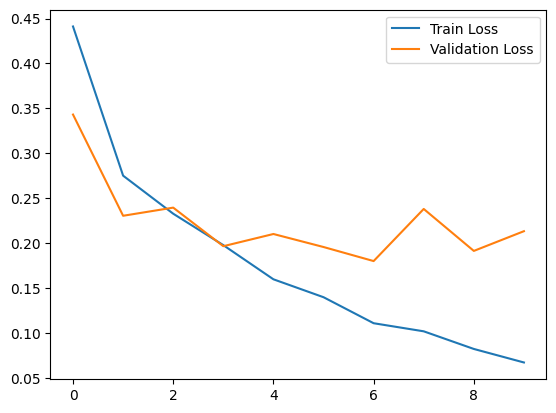

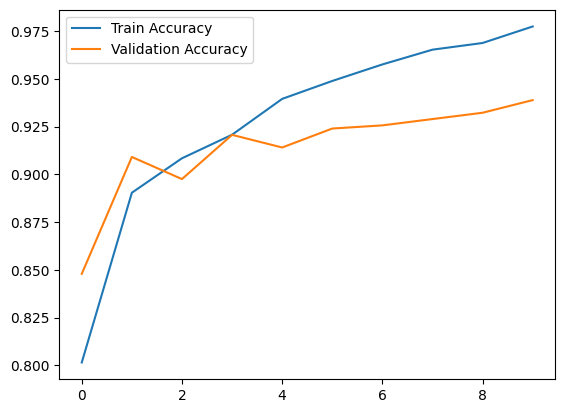

In [33]:
h = history

#plot the loss value

plt.plot(h.history['loss'],label='Train Loss')
plt.plot(h.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

#plot the accuracy value

plt.plot(h.history['accuracy'],label='Train Accuracy')
plt.plot(h.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/data/without_mask/without_mask_124.jpg


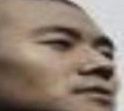

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.3488003 0.5977793]]
[np.int64(1)]
The person is wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_prediction_label = [np.argmax(input_prediction)]
print(input_prediction_label)

if input_prediction_label[0] == 1:
  print('The person is wearing a mask')
else:
  print('The person is not wearing a mask')

In [40]:
model.save("face_mask_detection.h5")

# Version 2.0

In [60]:
import os
import matplotlib.pyplot as plt
import cv2
import random


In [61]:
# Paths
with_mask_path = 'data/with_mask'
without_mask_path = 'data/without_mask'

# Count images
print("Images with mask:", len(os.listdir(with_mask_path)))
print("Images without mask:", len(os.listdir(without_mask_path)))

Images with mask: 3725
Images without mask: 3828


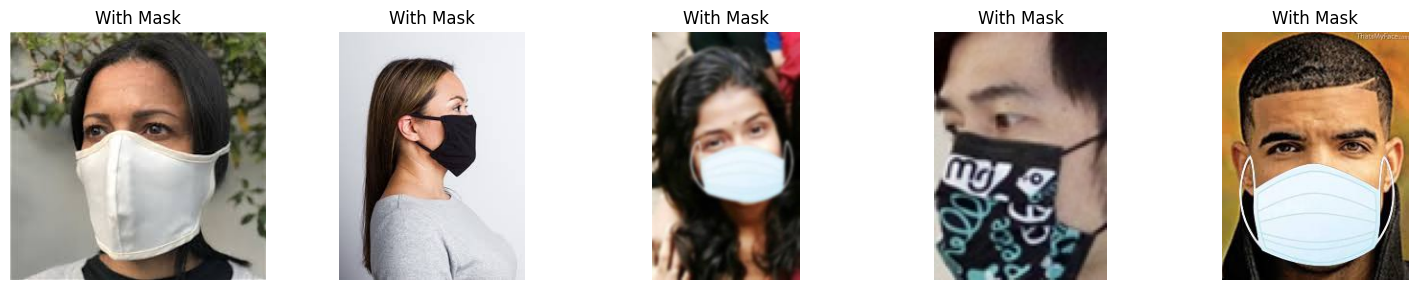

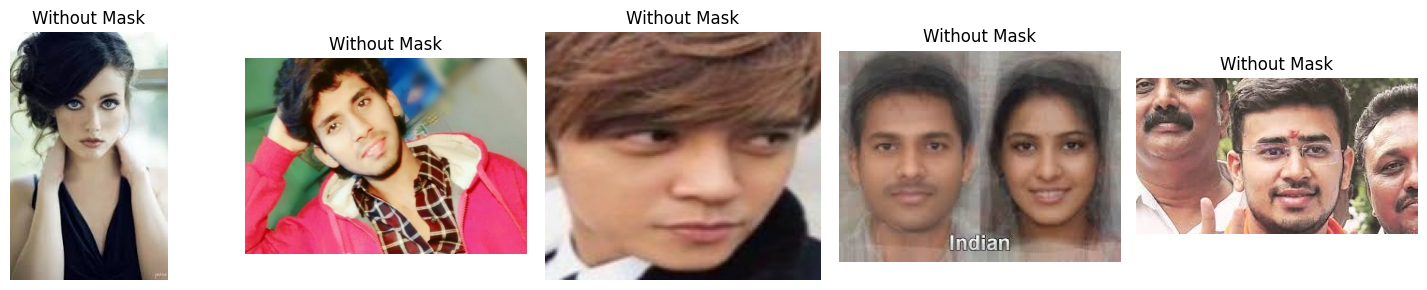

In [62]:
# Show some sample images
def show_images(path, label, n=5):
    images = random.sample(os.listdir(path), n)
    plt.figure(figsize=(15, 3))
    for i, img in enumerate(images):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(with_mask_path, "With Mask")
show_images(without_mask_path, "Without Mask")

In [63]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split

# Constants
IMG_SIZE = 96

data = []
labels = []

# Load images from with_mask
for img_name in os.listdir(with_mask_path):
    img_path = os.path.join(with_mask_path, img_name)
    image = cv2.imread(img_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = img_to_array(image)
    data.append(image)
    labels.append(1)  # with_mask = 0

# Load images from without_mask
for img_name in os.listdir(without_mask_path):
    img_path = os.path.join(without_mask_path, img_name)
    image = cv2.imread(img_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = img_to_array(image)
    data.append(image)
    labels.append(0)  # without_mask = 1



In [64]:

# Convert to numpy arrays
data = np.array(data, dtype="float32") / 255.0  # normalize
labels = np.array(labels)



In [65]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, stratify=labels, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 6042
Testing samples: 1511


In [66]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = EfficientNetB0(include_top=False, input_shape=(96, 96, 3), weights='imagenet')
base_model.trainable = False  # freeze base model for now

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 96, 96, 3) │          0 │ input_layer_6[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 96, 96, 3) │          7 │ rescaling_2[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 96, 96, 3) │          0 │ normalization_1[… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 97, 97, 3) │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 48, 48,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 48, 48,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 48, 48,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 48, 48,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 48, 48,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 48, 48,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 48, 48,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 48, 48,    │        512 │ block1a_se_excit

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [67]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10,
    verbose=1
)


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.4917 - loss: 0.7058 - val_accuracy: 0.5069 - val_loss: 0.6930
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.4949 - loss: 0.7014 - val_accuracy: 0.4931 - val_loss: 0.6932
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4961 - loss: 0.6998 - val_accuracy: 0.4931 - val_loss: 0.6943
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5027 - loss: 0.6972 - val_accuracy: 0.5069 - val_loss: 0.6930
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5026 - loss: 0.6950 - val_accuracy: 0.4931 - val_loss: 0.6931
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5043 - loss: 0.6934 - val_accuracy: 0.5069 - val_loss: 0.6931
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4946 - loss: 0.6952 - val_accuracy: 0.5069 - val_loss: 0.6929
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4835 - loss: 0.6968 - val_a

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 20, 20, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 2, 2, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,649 (670.50 KB)

 Trainable params: 171,649 (670.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.6206 - loss: 0.6407 - val_accuracy: 0.8518 - val_loss: 0.3671
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8696 - loss: 0.3440 - val_accuracy: 0.9040 - val_loss: 0.2554
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8997 - loss: 0.2644 - val_accuracy: 0.9179 - val_loss: 0.2260
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9201 - loss: 0.2172 - val_accuracy: 0.9265 - val_loss: 0.1922
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9279 - loss: 0.2011 - val_accuracy: 0.9265 - val_loss: 0.1929
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9369 - loss: 0.1832 - val_accuracy: 0.9252 - val_loss: 0.1831
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9380 - loss: 0.1646 - val_accuracy: 0.9477 - val_loss: 0.1497
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9490 - loss: 0.1393 - val_acc

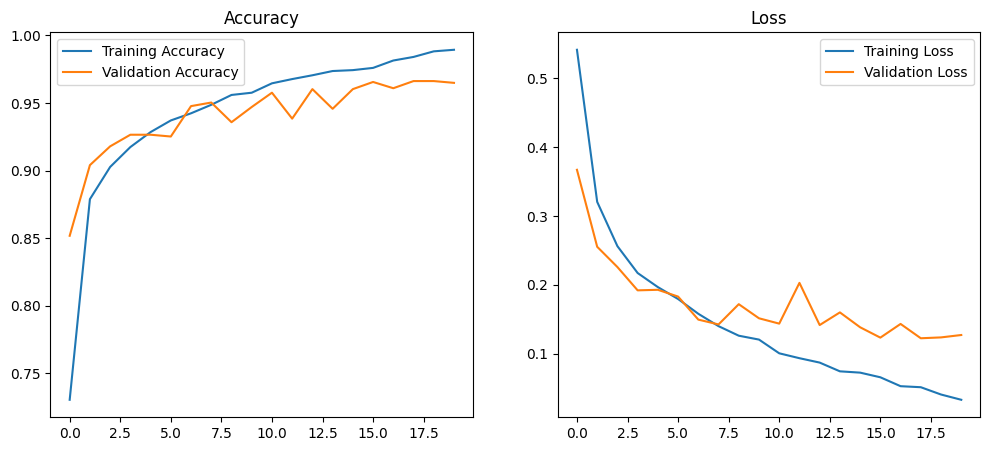

In [69]:
import matplotlib.pyplot as plt

# Assuming you saved model.fit(...) into `history`
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_training(history)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Classification Report:
              precision    recall  f1-score   support

   With Mask       0.97      0.96      0.97       766
Without Mask       0.96      0.97      0.96       745

    accuracy                           0.96      1511
   macro avg       0.96      0.97      0.96      1511
weighted avg       0.97      0.96      0.96      1511



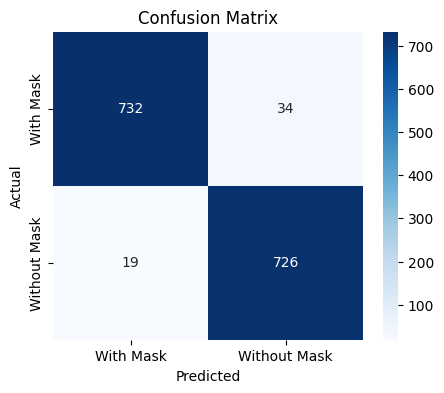

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=["With Mask", "Without Mask"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["With Mask", "Without Mask"],
            yticklabels=["With Mask", "Without Mask"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [71]:
model.save("face_mask_cnn_model.h5")


In [72]:
def predict_mask(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (96, 96))
    image_array = img_to_array(image_resized) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    prediction = model.predict(image_array)[0][0]
    label = "Mask" if prediction < 0.5 else "No Mask"
    confidence = (1 - prediction) if prediction < 0.5 else prediction
    confidence = round(confidence * 100, 2)

    # Show image and result
    plt.imshow(image_rgb)
    plt.title(f"{label} ({confidence}%)")
    plt.axis('off')
    plt.show()

    return label, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


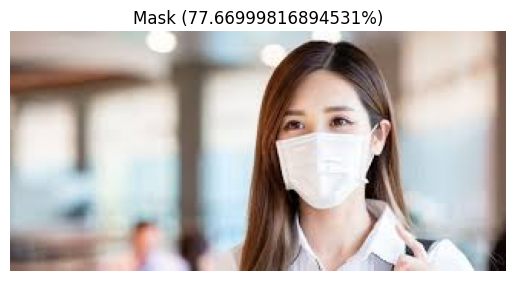

('Mask', np.float32(77.67))

In [73]:
 predict_mask('/content/images (9).jpeg')